In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
arr1 = np.array([[1., 3., 5., 7, 9.],
                [-2., 0., 2., 4., 6.],
                [-6., -3., 0., 3., 6.]])
x_vals = np.array([arr1, arr1 + 1])

In [3]:
x_vals

array([[[ 1.,  3.,  5.,  7.,  9.],
        [-2.,  0.,  2.,  4.,  6.],
        [-6., -3.,  0.,  3.,  6.]],

       [[ 2.,  4.,  6.,  8., 10.],
        [-1.,  1.,  3.,  5.,  7.],
        [-5., -2.,  1.,  4.,  7.]]])

In [4]:
x_vals.shape

(2, 3, 5)

In [5]:
x_data = tf.placeholder(tf.float32, shape=(3, 5))

In [6]:
m1 = tf.constant([[1.], [0.], [-1], [2.], [4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])

In [7]:
a1.shape

TensorShape([Dimension(1), Dimension(1)])

In [8]:
m1.shape

TensorShape([Dimension(5), Dimension(1)])

In [9]:
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

In [10]:
with tf.Session() as sess:
    for x_val in x_vals:
        print(sess.run(add1, feed_dict={x_data: x_val}))

[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


In [11]:
x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size=x_shape)

In [12]:
x_val

array([[[[0.79219292],
         [0.3444613 ],
         [0.31058717],
         [0.5382745 ]],

        [[0.78270856],
         [0.15797005],
         [0.24566869],
         [0.91045344]],

        [[0.76732513],
         [0.89895559],
         [0.93127118],
         [0.56263588]],

        [[0.36466346],
         [0.5603983 ],
         [0.44948312],
         [0.58293637]]]])

In [13]:
x_data = tf.placeholder(tf.float32, shape=x_shape)

In [14]:
x_data

<tf.Tensor 'Placeholder_1:0' shape=(1, 4, 4, 1) dtype=float32>

In [15]:
filter1 = tf.constant(0.25, shape=[2, 2, 1, 1])
stride1 = [1, 2, 2, 1]
mov_avg_layer = tf.nn.conv2d(x_data, filter1, stride1, padding='SAME', name='Moving_Avg_Window')

In [16]:
def custom_layer(input_matrix):
    input_matrix_squeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1., 2.], [-1., 3.]])
    b = tf.constant(1., shape=[2, 2])
    temp1 = tf.matmul(A, input_matrix_squeezed)
    temp = tf.add(temp1, b) # Ax + b
    return tf.sigmoid(temp)

In [17]:
with tf.name_scope('Custom_Layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)

In [18]:
with tf.Session() as sess:
    print(sess.run(custom_layer1, feed_dict={x_data: x_val}))

[[0.94348127 0.940722  ]
 [0.9186522  0.9163302 ]]


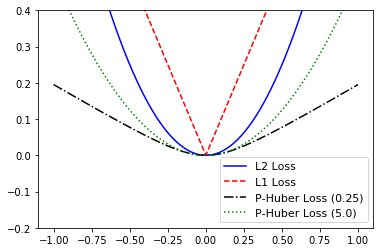

In [33]:
# Loss function for regression

x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

with tf.Session() as sess:
    l2_y_vals = tf.square(target - x_vals)
    l2_y_out = sess.run(l2_y_vals)
    
    l1_y_vals = tf.abs(target - x_vals)
    l1_y_out = sess.run(l1_y_vals)

    delta1 = tf.constant(0.25)
    phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)

    phuber1_y_out = sess.run(phuber1_y_vals)
    delta2 = tf.constant(5.)
    phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
    phuber2_y_out = sess.run(phuber2_y_vals)
    
    x_array = sess.run(x_vals)
    plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
    plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
    plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
    plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
    plt.ylim(-0.2, 0.4)
    plt.legend(loc='lower right', prop={'size': 11})
    plt.show()

[1.1601256]
[0.00012564]


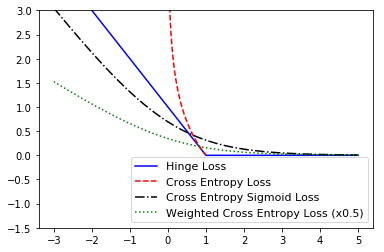

In [35]:
# Loss function for categorical outputs

x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

with tf.Session() as sess:
    hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
    hinge_y_out = sess.run(hinge_y_vals)
    
    xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
    xentropy_y_out = sess.run(xentropy_y_vals)
    
    xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels= targets)
    xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)
    
    weight = tf.constant(0.5)
    xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals, targets=targets, pos_weight=weight)
    xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)
    
    unscaled_logits = tf.constant([[1., -3., 10.]])
    target_dist = tf.constant([[0.1, 0.02, 0.88]])
    softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=unscaled_logits, labels=target_dist)
    print(sess.run(softmax_xentropy))
    
    unscaled_logits = tf.constant([[1., -3., 10.]])
    sparse_target_dist = tf.constant([2])
    sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist)
    print(sess.run(sparse_xentropy))
    
    x_array = sess.run(x_vals)
    plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
    plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
    plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
    plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
    plt.ylim(-1.5, 3)
    plt.legend(loc='lower right', prop={'size': 11})
    plt.show()


In [37]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

In [42]:
xa = tf.multiply(x_data, A)
loss = tf.square(xa - y_target)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = optimizer.minimize(loss)

In [46]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        rand_index = np.random.choice(100)
        rand_x = [x_vals[rand_index]]
        rand_y = [y_vals[rand_index]]
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        if (i) % 25 == 0:
            print('Step #' + str(i) + ' A = ' + str(sess.run(A)))
            print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #0 A = [1.1232152]
Loss = [78.68309]
Step #25 A = [6.788255]
Loss = [11.893176]
Step #50 A = [8.781639]
Loss = [2.893736]
Step #75 A = [9.431318]
Loss = [0.507865]


In [49]:
from tensorflow.python.framework import ops

In [50]:
ops.reset_default_graph()

In [51]:
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [62]:
x_plus_A = tf.add(x_data, A)
x_plus_A_expanded = tf.expand_dims(x_plus_A, 0)
y_target_expanded = tf.expand_dims(y_target, 0)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_plus_A_expanded, labels=y_target_expanded)
    optimizer = tf.train.GradientDescentOptimizer(0.05)
    train_step = optimizer.minimize(xentropy)
    
    for i in range(1400):
        rand_index = np.random.choice(100)
        rand_x = [x_vals[rand_index]]
        rand_y = [y_vals[rand_index]]
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        if (i + 1) % 200 == 0:
            print('Step {} : A = {} Loss = {}'.format(str(i + 1), str(sess.run(A)), str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y}))))

Step 200 : A = [5.241229] Loss = [[0.00076018]]
Step 400 : A = [1.3012258] Loss = [[0.04348132]]
Step 600 : A = [-0.03157805] Loss = [[0.03126411]]
Step 800 : A = [-0.56993186] Loss = [[0.05941249]]
Step 1000 : A = [-0.9323486] Loss = [[0.04874627]]
Step 1200 : A = [-1.045586] Loss = [[0.10765417]]
Step 1400 : A = [-0.9526823] Loss = [[0.08289881]]


Step #5 A=[[1.6868321]] Loss=69.48467
Step #10 A=[[3.197256]] Loss=44.886986
Step #15 A=[[4.4451375]] Loss=31.330578
Step #20 A=[[5.4604263]] Loss=19.647453
Step #25 A=[[6.2853556]] Loss=14.835106
Step #30 A=[[6.9573355]] Loss=9.059441
Step #35 A=[[7.50761]] Loss=7.1818323
Step #40 A=[[7.947893]] Loss=4.7146735
Step #45 A=[[8.327005]] Loss=4.5007296
Step #50 A=[[8.648283]] Loss=2.5298424
Step #55 A=[[8.920421]] Loss=2.8724148
Step #60 A=[[9.0983095]] Loss=1.1029843
Step #65 A=[[9.261156]] Loss=0.966575
Step #70 A=[[9.372545]] Loss=0.85695946
Step #75 A=[[9.460138]] Loss=1.1086748
Step #80 A=[[9.526162]] Loss=0.95534074
Step #85 A=[[9.559305]] Loss=1.5808744
Step #90 A=[[9.591623]] Loss=1.3620714
Step #95 A=[[9.650698]] Loss=1.6623055
Step #100 A=[[9.715717]] Loss=0.97018635
Step #5 A=[1.5738015] Loss=70.397705
Step #10 A=[3.0562875] Loss=49.717243
Step #15 A=[4.3174515] Loss=28.403404
Step #20 A=[5.3625774] Loss=21.768604
Step #25 A=[6.2301555] Loss=21.431387
Step #30 A=[6.9074435] Los

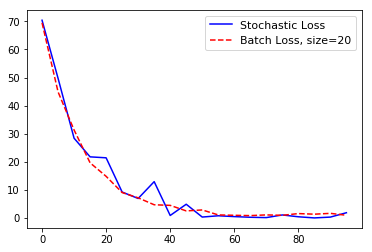

In [74]:
ops.reset_default_graph()

batch_size = 20

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))

x_matmul_A = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(x_matmul_A - y_target))
optimizer = tf.train.GradientDescentOptimizer(0.02)
train_step = optimizer.minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)  
    loss_batch = []
    for i in range(100):
        rand_index = np.random.choice(100, size=batch_size)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        if (i + 1) % 5 == 0:
#             print('rand_x: {}, rand_y: {}'.format(str(rand_x), str(rand_y)))
            temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
            loss_batch.append(temp_loss)
            print('Step #{} A={} Loss={}'.format(str(i+1), str(sess.run(A)), str(temp_loss)))

ops.reset_default_graph()
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

x_matmul_A = tf.multiply(x_data, A)
loss = tf.reduce_mean(tf.square(x_matmul_A - y_target))
optimizer = tf.train.GradientDescentOptimizer(0.02)
train_step = optimizer.minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)  
    loss_stochastic = []
    for i in range(100):
        rand_index = np.random.choice(100)
        rand_x = [x_vals[rand_index]]
        rand_y = [y_vals[rand_index]]
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        if (i + 1) % 5 == 0:
            temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
            loss_stochastic.append(temp_loss)
            print('Step #{} A={} Loss={}'.format(str(i+1), str(sess.run(A)), str(temp_loss)))
    
    plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
    plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
    plt.legend(loc='upper right', prop={'size': 11})
    plt.show()